In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import missingno as msno #for missing data
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px #for histogram

# Load the data into a DataFrame
data = pd.read_csv('../data/reData.csv')

# Display the dimensions of the data
print(data.shape)

# Display the column names and their data types
print(data.columns.values)
print(data.info())

# Display summary statistics for the numerical columns
print(data.describe())


(768, 18)
['Gender' 'College' 'Churn' 'Level' 'Residence' 'SIM_Usage' 'Usage_Freq'
 'Network_Strength' 'Voice_Calls' 'Mobile_Data_Internet'
 'SMS_Text_Messaging' 'Data_Exhaustion' 'Other_Networks'
 'Poor_Network_Quality_Coverage' 'Insufficient_Data_Allowance'
 'Unsatisfactory_Customer_Service' 'High_Costs_Pricing'
 'Monthly_Data_Usage']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           768 non-null    object 
 1   College                          768 non-null    object 
 2   Churn                            768 non-null    object 
 3   Level                            768 non-null    int64  
 4   Residence                        768 non-null    object 
 5   SIM_Usage                        768 non-null    object 
 6   Usage_Freq                       768 non-null    object

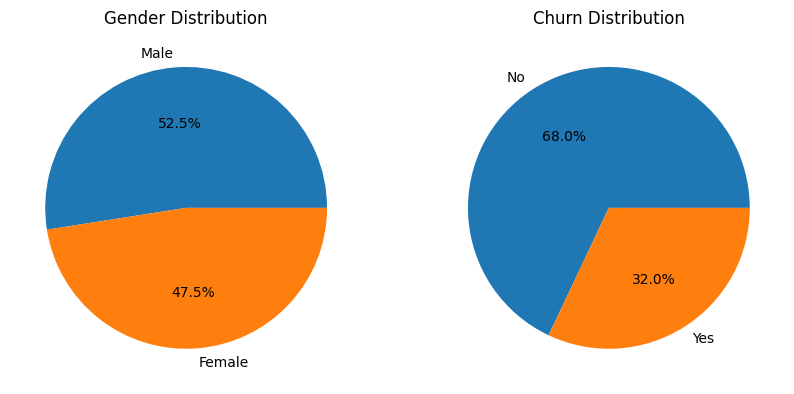

In [21]:
# Visualize the distribution of gender and churn
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gender distribution pie chart
axs[0].pie(data['Gender'].value_counts(), labels=g_labels, autopct='%1.1f%%')
axs[0].set_title('Gender Distribution')

# Churn distribution pie chart
axs[1].pie(data['Churn'].value_counts(), labels=c_labels, autopct='%1.1f%%')
axs[1].set_title('Churn Distribution')

plt.show()


In [22]:
# Visualize churn distribution by college
fig = px.histogram(data, x="Churn", color="College", title="Churn Distribution by College")
fig.update_layout(width=600, height=400)
fig.show()


In [23]:
# Visualize churn distribution by residence
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Residence", title="Churn Distribution by Residence", color_discrete_map=color_map)
fig.update_layout(width=600, height=400)
fig.show()

# Visualize usage frequency distribution
labels = data['Usage_Freq'].unique()
values = data['Usage_Freq'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='percent')])
fig.update_layout(title_text="Usage Frequency Distribution")
fig.show()

# Visualize network strength distribution
fig = go.Figure(data=[go.Bar(x=data['Network_Strength'].value_counts().index,
                             y=data['Network_Strength'].value_counts().values,
                             marker=dict(color='blue'))])
fig.update_layout(title_text="Network Strength Distribution",
                  xaxis_title="Network Strength",
                  yaxis_title="Count")
fig.show()


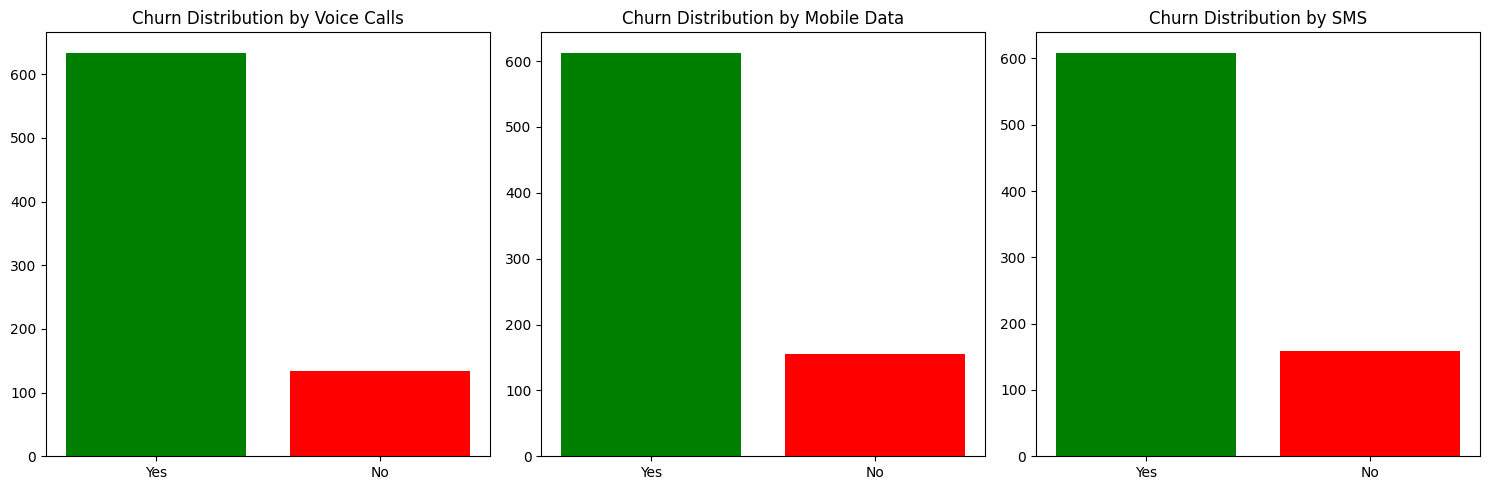

In [24]:
# Visualize churn distribution by voice calls, mobile data, and SMS
churn_values = ['Yes', 'No']
voice = data['Voice_Calls'].value_counts()
mobile_data = data['Mobile_Data_Internet'].value_counts()
sms = data['SMS_Text_Messaging'].value_counts()
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Voice calls churn distribution bar chart
axs[0].bar(churn_values, voice, color=['green', 'red'])
axs[0].set_title('Churn Distribution by Voice Calls')

# Mobile data churn distribution bar chart
axs[1].bar(churn_values, mobile_data, color=['green', 'red'])
axs[1].set_title('Churn Distribution by Mobile Data')

# SMS churn distribution bar chart
axs[2].bar(churn_values, sms, color=['green', 'red'])
axs[2].set_title('Churn Distribution by SMS')

plt.tight_layout()
plt.show()


d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\matplotlib\cbook.py:1762: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

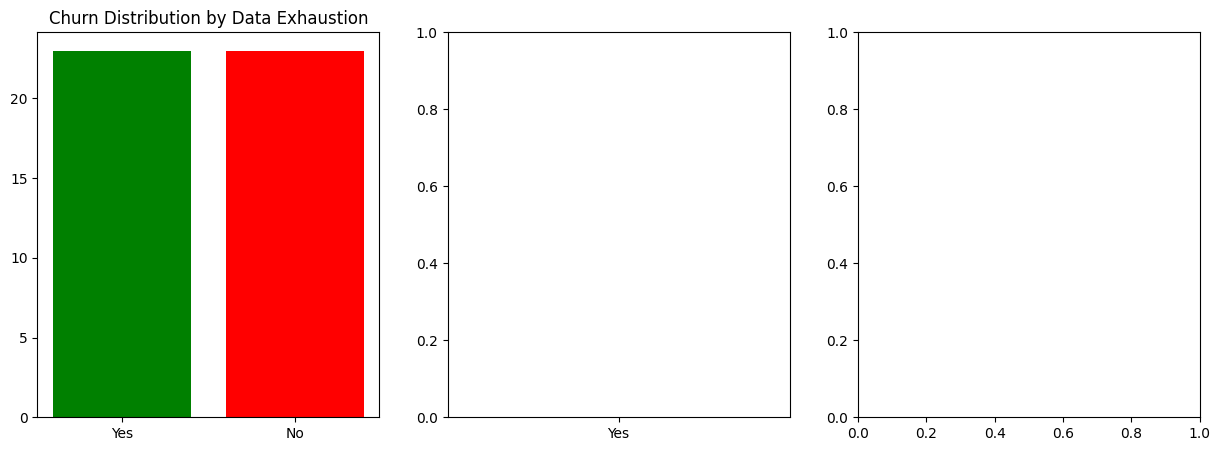

In [30]:
# Visualize churn distribution by data exhaustion, poor network quality, and high costs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Data exhaustion churn distribution bar chart
data_exhaustion = data[data['Data_Exhaustion'] == 'Yes']['Churn'].value_counts()
no_data_exhaustion = data[data['Data_Exhaustion'] == 'No']['Churn'].value_counts()
axs[0].bar(churn_values, height=23 ,color=['green', 'red'])
axs[0].set_title('Churn Distribution by Data Exhaustion')

# Poor network quality churn distribution bar chart
poor_network = data[data['Poor_Network_Quality_Coverage'] == 'Yes']['Churn'].value_counts()
good_network = data[data['Poor_Network_Quality_Coverage'] == 'No']['Churn'].value_counts()
axs[1].bar(churn_values, [good_network, poor_network], color=['green', 'red'])
axs[1].set_title('Churn Distribution by Network Quality')

# High costs churn distribution bar chart
high_costs = data[data['High_Costs_Pricing'] == 'Yes']['Churn'].value_counts()
affordable_costs = data[data['High_Costs_Pricing'] == 'No']['Churn'].value_counts()
axs[2].bar(churn_values, [affordable_costs, high_costs], color=['green', 'red'])
axs[2].set_title('Churn Distribution by Costs')

plt.tight_layout()
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical column and encode the values
category_feature = data.select_dtypes(include=['object']).columns
for feature in category_feature:
    data[feature] = le.fit_transform(data[feature])

# Display the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
for feature in category_feature:
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)

# Split the data into training and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")


Data preprocessing completed!


In [36]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import uniform
from scipy.stats import randint

# Initialize the models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nn = MLPClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Define the hyperparameters for each model
hyperparameters = {
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2']
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(1, 10)
    },
    # ...
}

# Perform randomized search and evaluate each model
for model in [lr, rf, knn, svm, gb, nn, lgbm]:
    # Define the hyperparameters for each model
    hyperparameters = {
        'LogisticRegression': {
            'C': uniform(0.1, 10),
            'penalty': ['l1', 'l2']
        },
        'RandomForestClassifier': {
            'n_estimators': randint(50, 200),
            'max_depth': randint(1, 10)
        },
        'KNeighborsClassifier': {
            'n_neighbors': randint(1, 10),
            'weights': ['uniform', 'distance']
        },
        'SVC': {
            'C': uniform(0.1, 10),
            'kernel': ['linear', 'rbf']
        },
        'GradientBoostingClassifier': {
            'learning_rate': uniform(0.01, 0.1),
            'n_estimators': randint(50, 200),
            'max_depth': randint(1, 10)
        },
        'MLPClassifier': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
            'activation': ['relu', 'tanh'],
            'alpha': uniform(0.0001, 0.001)
        },
        'LGBMClassifier': {
            'learning_rate': uniform(0.01, 0.1),
            'n_estimators': randint(50, 200),
            'max_depth': randint(1, 10)
        }
    }

    # Perform randomized search and evaluate each model
    for model in [lr, rf, knn, svm, gb, nn, lgbm]:
        model_name = model.__class__.__name__
        print(f"Tuning {model_name}...")
        
        # Initialize RandomizedSearchCV
        rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42)
        
        # Fit the model
        rs.fit(X_train, y_train)
        
        # Print the best parameters and score
        print(f"Best parameters: {rs.best_params_}")
        print(f"Best score: {rs.best_score_}")
        
        # Make predictions on the test set
        y_pred = rs.best_estimator_.predict(X_test)
        
        # Print the confusion matrix and classification report
        print(f"Confusion matrix for {model_name}:")
        print(confusion_matrix(y_test, y_pred))
        print(f"Classification report for {model_name}:")
        print(classification_report(y_test, y_pred))
        print("\n")
    
    # Print the confusion matrix and classification report
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...


d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]
Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg    

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Li

Best parameters: {'activation': 'tanh', 'alpha': 0.00103855270901575, 'hidden_layer_sizes': (100,)}
Best score: 0.9853258696521392
Confusion matrix for MLPClassifier:
[[111   0]
 [  3  40]]
Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 162, number of negative: 329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]
Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg    

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Li

Best parameters: {'activation': 'tanh', 'alpha': 0.00103855270901575, 'hidden_layer_sizes': (100,)}
Best score: 0.9853258696521392
Confusion matrix for MLPClassifier:
[[111   0]
 [  3  40]]
Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 162, number of negative: 329
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]
Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg    

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Li

Best parameters: {'activation': 'tanh', 'alpha': 0.00103855270901575, 'hidden_layer_sizes': (100,)}
Best score: 0.9853258696521392
Confusion matrix for MLPClassifier:
[[111   0]
 [  3  40]]
Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 162, number of negative: 329
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]
Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg    

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

d:\Projects\Research Paper Final year 4\.venv\Li

Best parameters: {'activation': 'tanh', 'alpha': 0.00103855270901575, 'hidden_layer_sizes': (100,)}
Best score: 0.9853258696521392
Confusion matrix for MLPClassifier:
[[111   0]
 [  3  40]]
Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 162, number of negative: 329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]
Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg    